#### The following are the steps that follow after we have conducted the optimization for the worst case scenarios. 
(According to assignment 9 we should try to reudce the number of policies to at most 50 and then we should reevaluate the set of solutons over 1000 scenarios using LHS)

 ### Dont forget, we should try to reduce the number of policies!! So far all solutions have been included.

In [1]:
import pickle
import pandas as pd
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [2]:
experiments = pd.read_csv("intermediate outputs/step6 - second re-evaluation - experiments description.csv")

outcomes_file = open("intermediate outputs/step6 - second re-evaluation - outcomes description.pkl", "rb")
outcomes = pickle.load(outcomes_file)

In [3]:
#calculating the maximum regret 
overall_regret = {}
max_regret = {}
regret = []

for scenario in experiments.scenario.unique():
    logical = experiments.scenario==scenario
    # for each scenario we get the values of the outcomes of all the policies that we are considering
    temp_results = {k:v[logical] for k,v in outcomes.items()} 
    temp_results = pd.DataFrame(temp_results)
    temp_experiments = experiments[experiments.scenario==scenario] # get the experiments description for the scenario
    
    best = temp_results.min() # a series containing for each outcome the minimum value
    scenario_regret = temp_results - best # for each policy it computes the difference with the best values
    scenario_regret['policy'] = temp_experiments.policy.values # add the name of the policy    
    regret.append(scenario_regret) # save the scenario_regret
    
    
regret = pd.concat(regret)
# for each policy and each outcome you get the highest regret they ever scored (among all the policies)
maxregret = regret.groupby('policy').max() 

In [4]:
data = maxregret.copy(deep=True)

In [5]:
data['Dike 4 & 5 - Total deaths'] = data['A.4_Expected Number of Deaths'] + data['A.5_Expected Number of Deaths']

In [6]:
data = data.loc[data['Dike 4 & 5 - Total deaths'] < np.percentile(data['Dike 4 & 5 - Total deaths'], 10)]
data = data.loc[data['Other.Dikes_Expected Number of Deaths'] < np.percentile(data['Other.Dikes_Expected Number of Deaths'], 10)]

In [7]:
data[['A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths', 'Other.Dikes_Expected Number of Deaths']]

,A.4_Expected Number of Deaths,A.5_Expected Number of Deaths,Other.Dikes_Expected Number of Deaths
policy,,,
scenario 0 option 1710,0.000148,0.001242,0.007199
scenario 0 option 1944,0.000000,0.000621,0.002499
scenario 0 option 2361,0.000000,0.000808,0.015643
scenario 0 option 2610,0.000093,0.000560,0.002499
scenario 0 option 2864,0.000000,0.000000,0.015643
scenario 0 option 3794,0.000224,0.001121,0.017525
scenario 0 option 3990,0.000026,0.000560,0.005214


In [8]:
data = data.reset_index()
std_values=[]
for index, row in data.iterrows():
    std_values.append(np.std([row["A.4_Expected Number of Deaths"], row["A.5_Expected Number of Deaths"], row["Other.Dikes_Expected Number of Deaths"]]))

In [9]:
data['std'] = std_values

In [10]:
data[['A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths', 'Other.Dikes_Expected Number of Deaths', 'std']]

,A.4_Expected Number of Deaths,A.5_Expected Number of Deaths,Other.Dikes_Expected Number of Deaths,std
0,0.000148,0.001242,0.007199,0.003099
1,0.000000,0.000621,0.002499,0.001062
2,0.000000,0.000808,0.015643,0.007191
3,0.000093,0.000560,0.002499,0.001042
4,0.000000,0.000000,0.015643,0.007374
5,0.000224,0.001121,0.017525,0.007953
6,0.000026,0.000560,0.005214,0.002330


In [11]:
data

,policy,A.4_Dike Investment Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Dike Investment Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths,Expected Evacuation Costs,RfR Total Costs,Other.Dikes_Expected Annual Damage,Other.Dikes_Total Dike Investment Costs,Other.Dikes_Expected Number of Deaths,Dike 4 & 5 - Total deaths,std
0,scenario 0 option 1710,2.495658e+07,1.888620e+06,0.000148,9.433819e+07,9.814407e+06,0.001242,1853.734403,1.022700e+09,3.163110e+07,3.681404e+08,0.007199,0.001390,0.003099
1,scenario 0 option 1944,3.064440e+07,0.000000e+00,0.000000,1.112824e+08,3.877621e+06,0.000621,378.166800,1.355800e+09,4.357418e+07,3.641969e+08,0.002499,0.000621,0.001062
2,scenario 0 option 2361,2.038434e+07,0.000000e+00,0.000000,1.093028e+08,5.648871e+06,0.000808,3800.022918,7.973000e+08,9.034653e+07,4.135457e+08,0.015643,0.000808,0.007191
3,scenario 0 option 2610,1.814408e+07,1.610260e+06,0.000093,4.419351e+07,4.699394e+06,0.000560,566.469772,8.743000e+08,4.357418e+07,1.817906e+08,0.002499,0.000653,0.001042
4,scenario 0 option 2864,2.038434e+07,0.000000e+00,0.000000,1.718952e+08,0.000000e+00,0.000000,614.145118,8.819000e+08,2.122767e+07,3.479959e+08,0.015643,0.000000,0.007374
5,scenario 0 option 3794,1.610892e+07,1.389727e+06,0.000224,7.908444e+07,2.928144e+06,0.001121,744.712049,1.084100e+09,2.755242e+07,2.954979e+08,0.017525,0.001344,0.007953
6,scenario 0 option 3990,2.669677e+07,4.611725e+05,0.000026,4.419351e+07,4.699394e+06,0.000560,1266.674306,8.819000e+08,2.399098e+07,3.358836e+08,0.005214,0.000586,0.002330


In [12]:
winner = data.loc[data['std'] == data['std'].min()]
winner

,policy,A.4_Dike Investment Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Dike Investment Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths,Expected Evacuation Costs,RfR Total Costs,Other.Dikes_Expected Annual Damage,Other.Dikes_Total Dike Investment Costs,Other.Dikes_Expected Number of Deaths,Dike 4 & 5 - Total deaths,std
3,scenario 0 option 2610,1.814408e+07,1.610260e+06,0.000093,4.419351e+07,4.699394e+06,0.00056,566.469772,874300000.0,4.357418e+07,1.817906e+08,0.002499,0.000653,0.001042


In [18]:
data = data.set_index('policy')

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:197: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


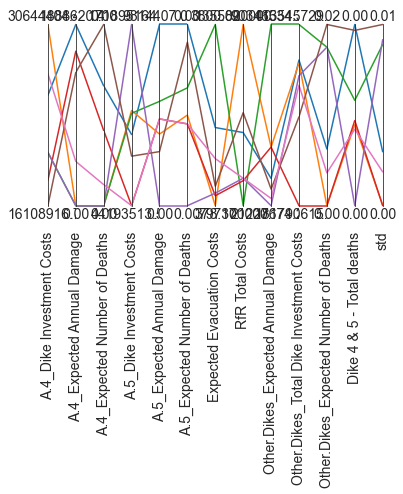

In [19]:
limits = parcoords.get_limits(data)
paraxes = parcoords.ParallelAxes(data)
paraxes.plot(data)
plt.show()

Our analysis is the red (the one with the lowest std)!

In [20]:
all_scenarios=[]
for scenario in experiments.scenario.unique():
    logical = experiments.scenario==scenario
    # for each scenario we get the values of the outcomes of all the policies that we are considering
    temp_results = {k:v[logical] for k,v in outcomes.items()} 
    temp_results = pd.DataFrame(temp_results)
    temp_experiments = experiments[experiments.scenario==scenario] # get the experiments description for the scenario
    
    scenario_values = temp_results# for each policy it computes the difference with the best values
    scenario_values['policy'] = temp_experiments.policy.values # add the name of the policy    
    all_scenarios.append(scenario_values) # save the scenario_regret
    
    
all_scenarios = pd.concat(all_scenarios)

In [21]:
our_policy_scenario_values = all_scenarios.loc[all_scenarios['policy'] == 'scenario 0 option 2610']

In [22]:
our_policy_scenario_values['A.4_Expected Annual Damage'].mean()

16102.595448638465

In [23]:
# combine everything
full = experiments.copy(deep=True)
for outcome in outcomes:
    full[outcome] = outcomes[outcome]

In [37]:
x = full.sample(n = 4999)
y = x['A.4_Expected Annual Damage'] > 16102.595448638465

In [45]:
x = x.drop(columns=['A.4_Dike Investment Costs', 'A.4_Expected Annual Damage',
       'A.4_Expected Number of Deaths', 'A.5_Dike Investment Costs',
       'A.5_Expected Annual Damage', 'A.5_Expected Number of Deaths',
       'Expected Evacuation Costs', 'RfR Total Costs',
       'Other.Dikes_Expected Annual Damage',
       'Other.Dikes_Total Dike Investment Costs',
       'Other.Dikes_Expected Number of Deaths'])

In [46]:
#scenario discovery 
from ema_workbench.analysis import prim

prim_alg = prim.Prim(x,y, threshold=0.6)
box = prim_alg.find_box()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([   0,    1,    3,    4,    5,\n            ...\n            4994, 4995, 4996, 4997, 4998],\n           dtype='int64', length=4576). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [32]:
count = 0
for i in y:
    if i is True:
        count += 1
count

0

In [35]:
box.show_tradeoff()
plt.show()

ZeroDivisionError: division by zero

<Figure size 432x288 with 2 Axes>